 # NYC Airbnb - How much does it cost to rent an AirBnb apartment in NYC??
 ## In this project, I will try to predict the median price of apartment or room rental in each NYC

<B><font size = 3>Import useful libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<B><font size=3>Upload the data:

In [69]:
data = pd.read_csv(r'C:\Users\meirk\Desktop\AB_NYC_2019.csv')

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Exploring the Data

<br><B>lets look at the columns:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<B>Identifying NaN values:

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see, some columns have NaN vlues. we'll take care of them later.

### Explanation of columns:
**id:** property serial numbe.  
**name:** description of the property.  
**host_id:** host serial number.  
**host_name:** name of the owner of the property, the host.  
**neighbourhood_group:** in which quarter the property is located.  
**neighbourhood:** in which neighbourhood the property is located. 
**latitude:** latitude location of the proplerty.
**longitude:** longitude location of the property.  
**longitude and latitude are both represent the loction of the property.**  
**room_type:** the type of the property (room, apartment ect.).  
**price:** how much money the host require for renting.<br>
**minimum_nights:** the minimal number of nights the renter must pay for.  
**number_of_reviews:** how many reviews were wrriten about this property.  
**last_review:** when did the last review was written.
<br>**reviews_per_month:** how many reviews were written on average.  
**calculated_host_listings_count:** how many times host's properties   where ranted.
**avaliability_365:** number of days when listing is available.

How many apartments\rooms are aviable in each neighbourhood:

Text(0.5, 1.0, 'dividing by neighbourhood')

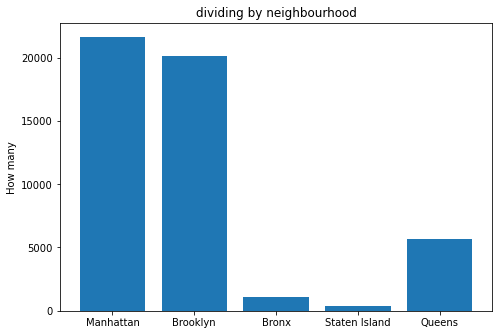

In [8]:
nighe_ = data.groupby('neighbourhood_group')
manhattan_count = nighe_.get_group('Manhattan')['id'].count()
brooklyn_count = nighe_.get_group('Brooklyn')['id'].count()
bronx_count = nighe_.get_group('Bronx')['id'].count()
statisland_count = nighe_.get_group('Staten Island')['id'].count()
queens_count = nighe_.get_group('Queens')['id'].count()

nigheList = ['Manhattan','Brooklyn', 'Bronx', 'Staten Island', 'Queens']
how_many = [manhattan_count, brooklyn_count, bronx_count, statisland_count, queens_count]

fig = plt.figure()
axs = fig.add_axes([0,0,1,1])
axs.bar(nigheList,how_many)
axs.set_ylabel('How many')
axs.set_title('dividing by neighbourhood')

In [40]:
nigheList = ['Manhattan','Brooklyn', 'Bronx', 'Staten Island', 'Queens']
how_many = [manhattan_count, brooklyn_count, bronx_count, statisland_count, queens_count]
df = pd.DataFrame(how_many,nigheList, columns= {'how many'})
df

,how many
Manhattan,21661
Brooklyn,20104
Bronx,1091
Staten Island,373
Queens,5666


As we can see, Manhattan has the largest amount of avaiable rooms with 21,661 avaiable rooms when Staten Island has the smallest amount of avaiable rooms with only 373!

<B>Mean price:

In [41]:
mean_price = data['price'].mean()
print('The mean price is: ', mean_price)

The mean price is:  152.7206871868289


Lets see what is the mean price in each quarter of NYC:

Text(0.5, 1.0, 'Mean price of each neighbourhood')

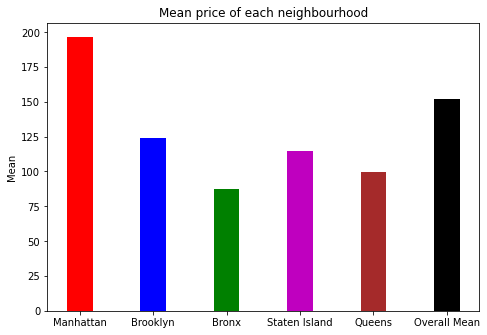

In [26]:
manhattan_mean = nighe_.get_group('Manhattan')['price'].mean()
brooklyn_mean = nighe_.get_group('Brooklyn')['price'].mean()
bronx_mean = nighe_.get_group('Bronx')['price'].mean()
staten_mean = nighe_.get_group('Staten Island')['price'].mean()
quees_mean = nighe_.get_group('Queens')['price'].mean()

width = 0.35
fig = plt.figure()
axs = fig.add_axes([0,0,1,1])
axs.bar('Manhattan', manhattan_mean, width ,color = 'r')
axs.bar('Brooklyn', brooklyn_mean,width , color = 'b')
axs.bar('Bronx', bronx_mean, width,color = 'g')
axs.bar('Staten Island', staten_mean, width, color = 'm')
axs.bar('Queens', quees_mean, width,color =  'brown')
axs.bar('Overall Mean', mean_price, width, color = 'k')
axs.set_ylabel('Mean')
axs.set_title('Mean price of each neighbourhood')

as we can see, the mean price is 152.72 per night, 4 out of 5 quarter has a mean price lower than the general mean, and Manhattan has much higer mean price.

### Lets prepare the data:
Lets clean our data:

In [53]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are some NaN values in my dataset, nither of them is needed in my project so I leave them as they are. 